In [90]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Read data

In [107]:
data = []

with open("iris.txt", "r") as f:
    for line in f.readlines():
        data.append(list(map(float, line.split())))

data = np.array(data)
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [108]:
y = data[:, 4].astype(int)
data = data[:, :-1]
y.shape, data.shape

((150,), (150, 4))

## PCA

In [130]:
def pca(data: np.array, l: int = 2) -> np.array:
    """
    Perform PCA transformation on data
    
    :param data: data you want to transform
    :param l: desired resulting dimensions
    :returns: transofmed data
    """
    A = data.T @ data
    eigen_values, eigen_vectors = np.linalg.eig(A)
    indicies = eigen_values.argsort()[-l:][::-1]
    D = np.array(eigen_vectors[indicies])

    return data @ D.T

In [131]:
tdata = pca(data)
tdata.shape

(150, 2)

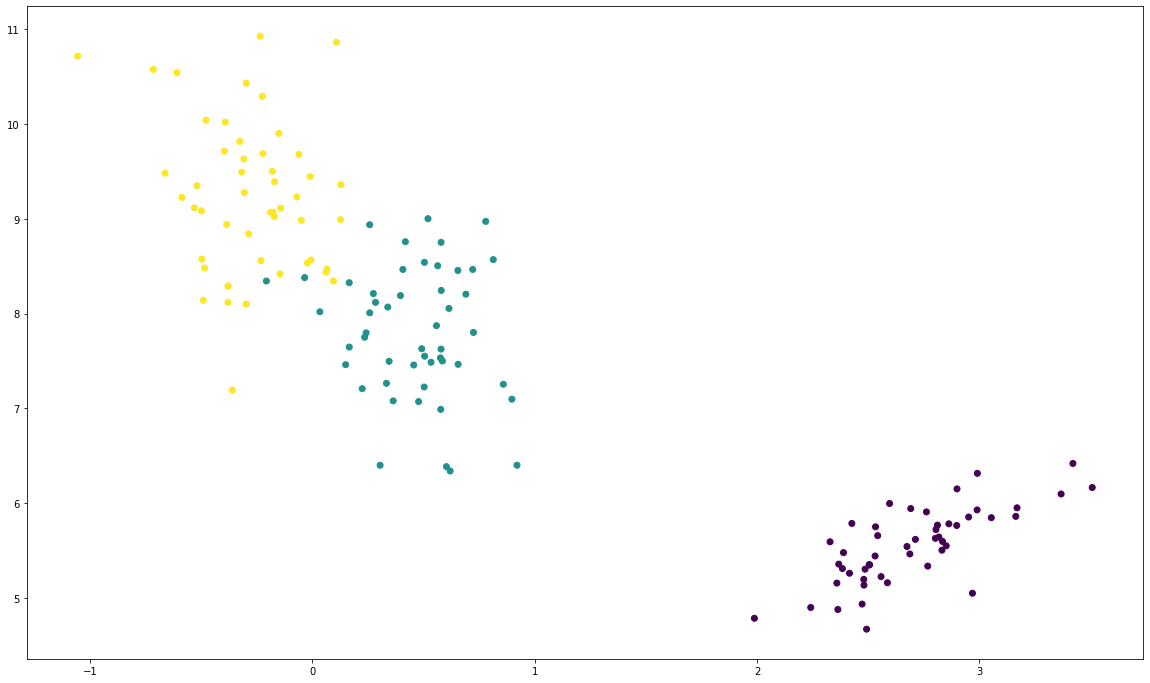

In [132]:
plt.figure(figsize=(20,12))
plt.scatter(tdata[:, 1], tdata[:, 0], c=y)

## PCA from scipy

In [133]:
sk_pca = PCA(n_components=2, svd_solver="arpack", whiten=True)
skdata = sk_pca.fit_transform(data)

In [134]:
skdata.shape

(150, 2)

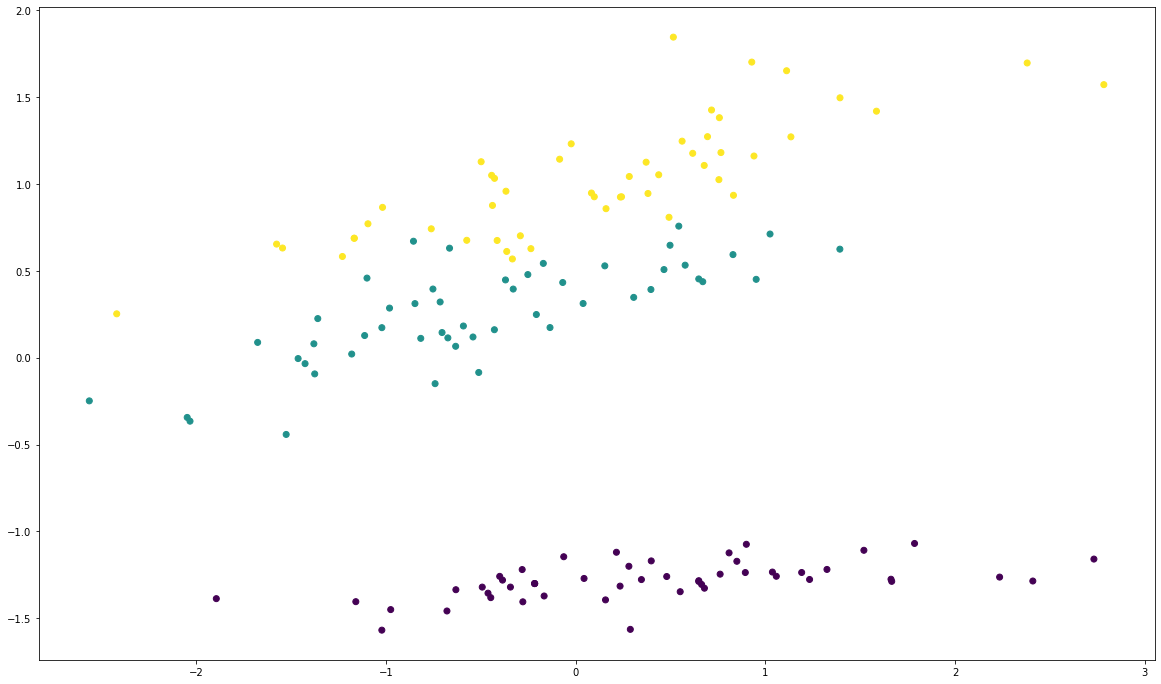

In [135]:
plt.figure(figsize=(20,12))
plt.scatter(skdata[:, 1], skdata[:, 0], c=y)